In [0]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.5


In [0]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-e3f9d523-c5dd-4f8f-8ac4-c487a764a4b7/bin/python -m pip install --upgrade pip' command.


In [0]:
# Instala o PyTorch
!pip install -q torch 

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-e3f9d523-c5dd-4f8f-8ac4-c487a764a4b7/bin/python -m pip install --upgrade pip' command.


In [0]:
# Import e Dowload NLTK
import nltk
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Out[4]: True

In [0]:
# Imports
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.autograd import Variable
from nltk.tokenize import word_tokenize
%matplotlib inline
torch.manual_seed(1)

Out[5]: <torch._C.Generator at 0x7f474460f410>

In [0]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Eric Passos" --iversions

Author: Eric Passos

nltk      : 3.6.5
torch     : 1.12.1+cpu
numpy     : 1.20.3
matplotlib: 3.4.3



In [0]:
# Abre o arquivo para leitura e carrega na variável arquivo_texto
arquivo_texto = open('/dbfs/FileStore/shared_uploads/eric.passos@dataside.com.br/asimov.txt', 'r')

# Converte as palavars para minúsculo
texto = arquivo_texto.read().lower()

In [0]:
# Fecha o arquivo
arquivo_texto.close()

In [0]:
# Tokenização do texto
texto_token = word_tokenize(texto)

In [0]:
# Variável para o comprimento total dos tokens
comp_tokens = len(texto_token)

In [0]:
print("Número de Tokens: ", comp_tokens)

Número de Tokens:  5282


### Crear el vocabulario

In [0]:
# Criando o vocabulário
vocab = set(texto_token)
vocab_size = len(vocab)
print("Tamanho do Vocabulário:", vocab_size)

Tamanho do Vocabulário: 1397


In [0]:
# Dicionário para mapear as palavras aos índices
palavra_indice = {palavra: i for i, palavra in enumerate(vocab)}
palavra_indice

Out[13]: {'vez': 0,
 'nos': 1,
 'respondida': 2,
 'nem': 3,
 'largo': 4,
 'turbilhões': 5,
 'para': 6,
 'parte': 7,
 'ela': 8,
 'esbanjadoras': 9,
 'capazes': 10,
 'altos': 11,
 'antigo': 12,
 'lábios': 13,
 'entender': 14,
 'letras': 15,
 'escolhido': 16,
 'peso': 17,
 'deu': 18,
 'proporções.': 19,
 'único': 20,
 'levou': 21,
 'dobra': 22,
 'estão': 23,
 'hà': 24,
 'feixes': 25,
 'maneira': 26,
 'aproveitamos': 27,
 'história': 28,
 'tinham': 29,
 'gelo': 30,
 'lar.': 31,
 'benéfico': 32,
 'fino': 33,
 'momentos': 34,
 'através': 35,
 'só': 36,
 'meu': 37,
 'precisavam': 38,
 'à': 39,
 'precisar': 40,
 'ajustava-se': 41,
 'circuitos': 42,
 'possa': 43,
 'polegadas': 44,
 'leu': 45,
 'milhões': 46,
 'nada': 47,
 'inserida': 48,
 'sozinho': 49,
 'gasto': 50,
 'anjinhos': 51,
 'agora': 52,
 'gentil': 53,
 'sensação': 54,
 'trocar': 55,
 'explosão': 56,
 'destruídas': 57,
 'fazer': 58,
 'orbitando': 59,
 'terminar': 60,
 'estelar': 61,
 'eternidade': 62,
 'fumaça': 63,
 'termos': 64,
 'l

In [0]:
# Dicionário para mapear os índices às palavras
indice_palavra = {i: palavra for i, palavra in enumerate(vocab)}
indice_palavra

Out[14]: {0: 'vez',
 1: 'nos',
 2: 'respondida',
 3: 'nem',
 4: 'largo',
 5: 'turbilhões',
 6: 'para',
 7: 'parte',
 8: 'ela',
 9: 'esbanjadoras',
 10: 'capazes',
 11: 'altos',
 12: 'antigo',
 13: 'lábios',
 14: 'entender',
 15: 'letras',
 16: 'escolhido',
 17: 'peso',
 18: 'deu',
 19: 'proporções.',
 20: 'único',
 21: 'levou',
 22: 'dobra',
 23: 'estão',
 24: 'hà',
 25: 'feixes',
 26: 'maneira',
 27: 'aproveitamos',
 28: 'história',
 29: 'tinham',
 30: 'gelo',
 31: 'lar.',
 32: 'benéfico',
 33: 'fino',
 34: 'momentos',
 35: 'através',
 36: 'só',
 37: 'meu',
 38: 'precisavam',
 39: 'à',
 40: 'precisar',
 41: 'ajustava-se',
 42: 'circuitos',
 43: 'possa',
 44: 'polegadas',
 45: 'leu',
 46: 'milhões',
 47: 'nada',
 48: 'inserida',
 49: 'sozinho',
 50: 'gasto',
 51: 'anjinhos',
 52: 'agora',
 53: 'gentil',
 54: 'sensação',
 55: 'trocar',
 56: 'explosão',
 57: 'destruídas',
 58: 'fazer',
 59: 'orbitando',
 60: 'terminar',
 61: 'estelar',
 62: 'eternidade',
 63: 'fumaça',
 64: 'termos',
 65

A menos que se indique lo contrario, usamos un contexto de diez palabras a la izquierda y diez palabras a la derecha.

In [0]:
# Tamanho do contexto
CONTEXT_SIZE = 10

In [0]:
# Matriz de co-ocorrência preenchida com zeros
co_occ_mat = np.zeros((vocab_size, vocab_size))
co_occ_mat

Out[17]: array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Ahora pasamos los diccionarios de mapeo creados previamente y completamos la matriz de co-ocurrencia.

In [0]:
# Loop externo por todo comprimento do vocabulário
for i in range(comp_tokens):
    
    # Loop interno pelo tamanho do contexto
    for dist in range(1, CONTEXT_SIZE + 1):
        
        # Obtém o índice do token
        ix = palavra_indice[texto_token[i]]
        
        # Se a palara estiver à esquerda, inserimos à esquerda na matriz de co-ocorrência
        if i - dist > 0:
            left_ix = palavra_indice[texto_token[i - dist]]
            co_occ_mat[ix, left_ix] += 1.0 / dist
            
        # Se a palara estiver à direita, inserimos à direita na matriz de co-ocorrência
        if i + dist < len(texto_token):
            right_ix = palavra_indice[texto_token[i + dist]]
            co_occ_mat[ix, right_ix] += 1.0 / dist

In [0]:
# Matriz de co-ocorrência
co_occ_mat

Out[19]: array([[0.        , 0.        , 0.        , ..., 0.16666667, 0.        ,
        0.1       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16666667, 0.        , 0.        , ..., 0.4       , 0.5       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.1       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
# Transposta da matriz de co-ocorrências
# Retorna um array 2-D com uma linha para cada elemento não-zero 
co_occs = np.transpose(np.nonzero(co_occ_mat))

In [0]:
# Print
print("Shape da Matriz de Co-Ocorrência:", co_occ_mat.shape)

Shape da Matriz de Co-Ocorrência: (1397, 1397)


In [0]:
# Print
print("Matriz de Co-Ocorrência Não-Zero:\n", co_occs)

Matriz de Co-Ocorrência Não-Zero:
 [[   0    6]
 [   0   12]
 [   0   19]
 ...
 [1396 1241]
 [1396 1279]
 [1396 1342]]


### Crear el modelo

In [0]:
# Tamanho da embedding
EMBEDDING_SIZE = 50

In [0]:
# Hiperparâmetros
X_MAX = 100
ALPHA = 0.75
BATCH_SIZE = 32
LEARNING_RATE = 0.05
EPOCHS = 200

In [0]:
# Classe para o modelo
class Glove(nn.Module):

    # Método construtor
    def __init__(self, vocab_size, comat, embedding_size, x_max, alpha):
        super(Glove, self).__init__()
        
        # Matriz de embeddings com as palavras centrais
        self.embedding_V = nn.Embedding(vocab_size, embedding_size)
        
        # Matriz de embeddings com as palavras de contexto
        self.embedding_U = nn.Embedding(vocab_size, embedding_size)

        # Bias
        self.v_bias = nn.Embedding(vocab_size, 1)
        self.u_bias = nn.Embedding(vocab_size, 1)
        
        # Inicializa os parâmtetros (pesos que a rede aprende durante o treinamento)
        for params in self.parameters():
            nn.init.uniform_(params, a = -0.5, b = 0.5)
            
        # Define os hiperparâmetros (que controlam o treinamento)
        self.x_max = x_max
        self.alpha = alpha
        self.comat = comat
    
    # Função de forward
    def forward(self, center_word_lookup, context_word_lookup):
        
        # Matrizes embedding de pesos para centro e contexto
        center_embed = self.embedding_V(center_word_lookup)
        target_embed = self.embedding_U(context_word_lookup)

        # Matrizes embedding de bias para centro e contexto
        center_bias = self.v_bias(center_word_lookup).squeeze(1)
        target_bias = self.u_bias(context_word_lookup).squeeze(1)

        # Elementos da matriz de co-ocorrência
        co_occurrences = torch.tensor([self.comat[center_word_lookup[i].item(), context_word_lookup[i].item()]
                                       for i in range(BATCH_SIZE)])
        
        # Carrega os pesos
        weights = torch.tensor([self.weight_fn(var) for var in co_occurrences])

        # Funçã de perda
        loss = torch.sum(torch.pow((torch.sum(center_embed * target_embed, dim = 1)
            + center_bias + target_bias) - torch.log(co_occurrences), 2) * weights)
        
        return loss
       
    # Definição do peso
    def weight_fn(self, x):
        if x < self.x_max:
            return (x / self.x_max) ** self.alpha
        return 1
        
    # Soma de V e U como nossos vetores de palavras
    def embeddings(self):
        return self.embedding_V.weight.data + self.embedding_U.weight.data

In [0]:
# Função para gerar um bacth de palavras
def gera_batch(model, batch_size = BATCH_SIZE):
    
    # Extrai uma amostra
    sample = np.random.choice(np.arange(len(co_occs)), size = batch_size, replace = False)
    
    # Listas de vetores
    v_vecs_ix, u_vecs_ix = [], []
    
    # Loop pela amostra para gerar os vetores
    for chosen in sample:
        ind = tuple(co_occs[chosen])  
        
        lookup_ix_v = ind[0]
        lookup_ix_u = ind[1]
        
        v_vecs_ix.append(lookup_ix_v)
        u_vecs_ix.append(lookup_ix_u) 
        
    return torch.tensor(v_vecs_ix), torch.tensor(u_vecs_ix)

### Entrenamiento modelo

In [0]:
# Função para o treinamento
def treina_glove(comat):
    
    # Lista para os erros
    losses = []
    
    # Cria o modelo Glove
    model = Glove(vocab_size, comat, embedding_size = EMBEDDING_SIZE, x_max = X_MAX, alpha = ALPHA)
    
    # Otimizador
    optimizer = optim.Adagrad(model.parameters(), lr = LEARNING_RATE)
    
    # Loop pelo número de épocas
    for epoch in range(EPOCHS):
        
        # Erro total
        total_loss = 0
        
        # Número de bacthes
        num_batches = int(len(texto_token) / BATCH_SIZE)
        
        # Loop pelos batches
        for batch in tqdm(range(num_batches)):
            
            # Zera os gradientes do modelo
            model.zero_grad()
            
            # Obtém o bacth de dados
            data = gera_batch(model, BATCH_SIZE)
            
            # Calcula o erro
            loss = model(*data)
            
            # Executa o backpropagation
            loss.backward()
            
            # Otimiza os pesos (aqui é onde ocorre o aprendizado)
            optimizer.step()
            
            # Erro total para a epoch
            total_loss += loss.item()
            
        # Erros do modelo
        losses.append(total_loss)
        
        # Print da epoch e erro médio do modelo
        print('Epoch : %d, Erro Médio : %.02f' % (epoch, np.mean(losses)))
        
    return model, losses 

In [0]:
# Executa a função de treinamento e retorna o modelo e os erros
model, losses = treina_glove(co_occ_mat)

100%|██████████| 165/165 [00:00<00:00, 273.84it/s]
Epoch : 0, Erro Médio : 183.94
100%|██████████| 165/165 [00:00<00:00, 283.33it/s]
Epoch : 1, Erro Médio : 175.13
100%|██████████| 165/165 [00:00<00:00, 314.46it/s]
Epoch : 2, Erro Médio : 177.48
100%|██████████| 165/165 [00:00<00:00, 355.33it/s]
Epoch : 3, Erro Médio : 171.21
100%|██████████| 165/165 [00:00<00:00, 187.51it/s]
Epoch : 4, Erro Médio : 161.16
100%|██████████| 165/165 [00:00<00:00, 345.37it/s]
Epoch : 5, Erro Médio : 159.03
100%|██████████| 165/165 [00:00<00:00, 342.87it/s]
Epoch : 6, Erro Médio : 153.70
100%|██████████| 165/165 [00:00<00:00, 347.44it/s]
Epoch : 7, Erro Médio : 149.29
100%|██████████| 165/165 [00:00<00:00, 307.32it/s]
Epoch : 8, Erro Médio : 147.22
100%|██████████| 165/165 [00:00<00:00, 351.56it/s]
Epoch : 9, Erro Médio : 142.96
100%|██████████| 165/165 [00:00<00:00, 328.82it/s]
Epoch : 10, Erro Médio : 139.34
100%|██████████| 165/165 [00:00<00:00, 352.11it/s]
Epoch : 11, Erro Médio : 136.44
100%|█████████

In [0]:
# Função para o plot do erro durante o treinamento
def plot_loss(losses, title):
    plt.plot(range(len(losses)), losses)
    plt.xlabel('Epoch')
    plt.ylabel('Erro')
    plt.title(title)
    plt.figure()

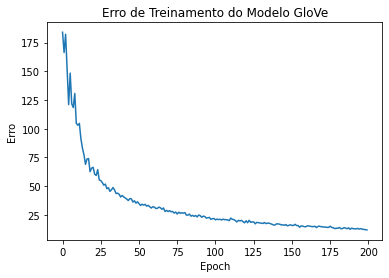

<Figure size 432x288 with 0 Axes>

In [0]:
# Plot
plot_loss(losses, "Erro de Treinamento do Modelo GloVe")

### Prueba del modelo: similitud de palabras, analogías de palabras

In [0]:
# Função que retorna a embedding de uma palavra
def get_palavra(palavra, modelo, word_to_ix):
    return model.embeddings()[word_to_ix[palavra]]

In [0]:
# Função para busca a palavra mais próxima
def busca_palavra_similaridade(vec, word_to_ix, n = 10):
    all_dists = [(w, torch.dist(vec, get_palavra(w, model, palavra_indice))) for w in palavra_indice]
    return sorted(all_dists, key = lambda t: t[1])[:n]

In [0]:
# Gerando o vetor (embedding) de uma palavra 
vector = get_palavra("espaço", model, palavra_indice)
print(vector)

tensor([-0.7018,  0.3016, -0.0958, -0.3624, -0.3387, -0.3424,  0.2970, -0.4657,
         0.0435, -0.6102, -0.1784,  0.3023, -0.6658, -0.1643, -0.6655, -0.1890,
         0.3069, -0.0094, -0.0759,  0.0228,  0.3036,  0.3219,  0.5959, -0.2540,
         0.6937,  0.2831, -0.6802, -0.0291,  0.6015, -0.0423, -0.3522, -0.9533,
         0.8402,  0.3116,  0.6320, -0.1315, -0.2989,  0.1198,  1.2698, -0.0834,
        -0.4395, -0.2904, -0.6198,  0.2936, -0.3939, -0.0949, -0.0535, -0.6117,
         0.3224, -0.1095])


In [0]:
# Busca as palavras similares à palavra "espaço"
busca_palavra_similaridade(vector, palavra_indice)

Out[36]: [('espaço', tensor(0.)),
 ('com', tensor(3.4000)),
 ('universo', tensor(3.4619)),
 ('galáctico', tensor(3.4937)),
 ('nem', tensor(3.5229)),
 ('tem', tensor(3.5276)),
 ('comprimento', tensor(3.5597)),
 ('televisor', tensor(3.5643)),
 ('este', tensor(3.5745)),
 ('gente', tensor(3.6015))]

Tenga en cuenta que la palabra "espaço" tiene una distancia de 0 a sí misma. La siguiente palabra más parecida a "espaço" es "universo" y así sucesivamente. Cuanto menor es la distancia, más similar es la palabra. Recordando que la búsqueda de similitud se realiza con incrustaciones entrenadas con el modelo GloVe.

Un ejemplo más:

In [0]:
# Gerando o vetor (embedding) de uma palavra 
vector = get_palavra("solar", model, palavra_indice)
print(vector)

tensor([-0.3083, -0.4301, -0.2868,  0.1254, -1.1010, -0.3225,  0.5754, -0.7881,
         0.7264, -0.2867,  0.3433, -0.2317, -0.9531,  0.4242,  0.7692,  0.1683,
         0.9031,  0.4141, -0.1682,  0.0748,  0.2886,  0.6519, -0.1678, -0.3751,
         0.8174, -0.0206,  0.2456, -0.7030,  0.1159, -0.4770,  0.0685, -0.6596,
        -0.4187, -0.0438,  0.0971, -0.1268, -0.4552,  0.3048,  0.3166,  0.2685,
        -0.5331,  0.0143,  0.6414, -0.6915,  0.1629,  1.0304, -0.4738, -0.2568,
         1.2829, -0.3359])


In [0]:
# Busca as palavras similares à palavra "solar"
busca_palavra_similaridade(vector, palavra_indice)

Out[38]: [('solar', tensor(0.)),
 ('energia', tensor(3.1621)),
 ('à', tensor(3.6011)),
 ('carregar', tensor(3.7791)),
 ('fumaça', tensor(3.8077)),
 ('com', tensor(3.8649)),
 ('incontáveis', tensor(3.8873)),
 ('imortais', tensor(3.8942)),
 ('meu', tensor(3.9037)),
 ('unidades', tensor(3.9195))]

La distancia de la palabra "solar" a sí misma es 0 y la palabra con la mayor similitud es "energia", lo que tiene mucho sentido si lees el texto de Asimov que se usó para entrenar el modelo.

### Analogía

![imagem](files/tables/glove.png)

Tenga en cuenta en la imagen de arriba que creamos una "fórmula" con 3 palabras para buscar la cuarta palabra, lo cual se hace por analogía con incrustaciones (vectores de palabras).

Luego creamos una función para buscar la palabra por analogía en el formato:

palabra1 : palabra2 :: palabra3 : ?

In [0]:
# Função para busca de palavra por analogia
def busca_analogia(p1, p2, p3, n = 5, filtro = True):
    
    # Print
    print('\n[%s : %s :: %s : ?]' % (p1, p2, p3))
   
    # p2 - p1 + p3 = p4
    closest_words = busca_palavra_similaridade(get_palavra(p2, model, palavra_indice) - 
                                               get_palavra(p1, model, palavra_indice) + 
                                               get_palavra(p3, model, palavra_indice), 
                                               palavra_indice)
    
    # Vamos excluir as 3 palavras passadas como parâmetro
    if filtro:
        closest_words = [t for t in closest_words if t[0] not in [p1, p2, p3]]
        
    for tuple in closest_words[:n]:
        print('(%.4f) %s' % (tuple[1], tuple[0]))

In [0]:
# Busca por analogia
busca_analogia("família", "crianças", "humano")


[família : crianças :: humano : ?]
(5.2347) dessas
(5.3481) únicos
(5.4792) qualquer
(5.5147) fundamentação
(5.5312) assustados


Y ahí están las palabras que mejor se ajustan a la cuarta palabra, según nuestro modelo.

¡A mayor distancia, menor similitud! Entrena al modelo con tus propios textos y experimenta con la búsqueda de similitud.

# Fin